## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решение задействуйте np.reshape и/или np.newaxis.

In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
import seaborn as sns
import datetime

In [2]:
def vandermond(a: np.array):
    b = np.arange(0, len(a))
    vand_matrix = a ** b[:, np.newaxis]
    return vand_matrix

In [3]:
# Использует вложенный цикл

# def vandermond(a: np.array):
#     vand_matrix = np.reshape([a ** i for i in range(len(a))], (len(a), len(a)))
#     return vand_matrix

In [4]:
#a = np.array(list(map(float, input().split())))
#vandermond(a)
vandermond(np.array([1, 2, 3, 4]))

array([[ 1,  1,  1,  1],
       [ 1,  2,  3,  4],
       [ 1,  4,  9, 16],
       [ 1,  8, 27, 64]])

## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

In [5]:
def marathon(n):  # функция от n создает матрицу 10000 X n X 4
    wp = np.random.exponential(scale=1, size=(10000, n))
    pyat = np.random.normal(loc=1, scale=1, size=(10000, n))
    krol = np.random.poisson(lam=1, size=(10000, n))
    iaia = np.random.choice([0, 2], p=[0.5, 0.5], size=(10000, n))
    return np.array([wp, pyat, krol, iaia])

In [6]:
mar0 = marathon(2)[:, 0] # пример того, как первый(нулевой) двухчасовой марафон пробежал каждый участник
mar0

array([[0.27500237, 1.50804391],
       [0.65007473, 0.54530072],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [7]:
a = np.sum(mar0, axis=1)
a

array([1.78304629, 1.19537545, 0.        , 0.        ])

In [8]:
list(a).index(max(a))

0

In [9]:
mar = marathon(100)

In [10]:
d = {'0': 'Winni-Pooh', '1': 'Pyatachok', '2': 'Krolik', '3': 'Ia-Ia'}

In [11]:
np.sum(mar[:, 0], axis=1)

array([ 90.85563617,  91.68303622, 117.        , 108.        ])

In [12]:
winners = [d[str(list(np.sum(mar[:, n], axis=1)).index(max(np.sum(mar[:, n], axis=1))))] for n in range(len(mar[0]))]

In [13]:
y_pos = np.arange(4)

Text(0, 0.5, 'количество побед в забеге')

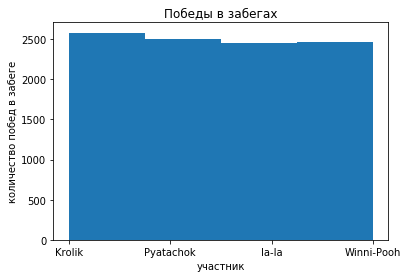

In [14]:
#colors = ['r', 'y', 'b', 'g']
plt.hist(winners, bins=4)
plt.title('Победы в забегах')
plt.xlabel('участник')
plt.ylabel('количество побед в забеге')

Количество побед при двухчасовых/пятичасовых/десятичасовых/сточасовых забегах распределено относительно близко к равномерному среди распределений. 
При повышении количества часов в забеге, количество побеед распределяется более равномерно(большие выборки более репрезентативны для законов).

In [15]:
def team_marathon(n):
    wp = np.random.exponential(scale=1, size=(10000, n))
    pyat = np.random.normal(loc=1, scale=1, size=(10000, n))
    krol = np.random.poisson(lam=1, size=(10000, n))
    iaia = np.random.choice([0, 2], p=[0.5, 0.5], size=(10000, n))
    return np.array([wp + pyat, krol + iaia])

In [16]:
team_marathon(2) # Пример результатов для команд при двухчасовом забеге

array([[[ 1.75258161,  0.36635849],
        [ 4.38961197,  2.532881  ],
        [ 4.5874091 ,  1.29934895],
        ...,
        [ 0.9348159 ,  1.19241866],
        [ 3.03912276,  2.77542893],
        [-0.71074896,  1.19958007]],

       [[ 4.        ,  3.        ],
        [ 0.        ,  4.        ],
        [ 1.        ,  1.        ],
        ...,
        [ 1.        ,  2.        ],
        [ 2.        ,  2.        ],
        [ 4.        ,  2.        ]]])

In [17]:
d = {'0': 'Winni-Pooh + Pyatachok', '1': 'Krolik + Ia-Ia'}

In [18]:
team__mar = team_marathon(100)

In [19]:
team_winners = [d[str(list(np.sum(team__mar[:, n], axis=1)).index(max(np.sum(team__mar[:, n], axis=1))))] for n in range(len(team__mar[0]))]

Text(0, 0.5, 'количество побед в забеге')

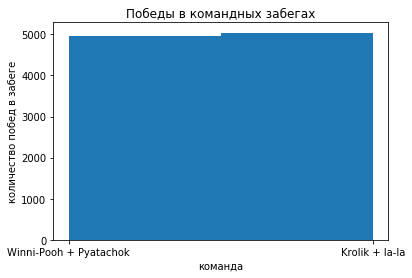

In [20]:
#colors = ['r', 'y', 'b', 'g']
plt.hist(team_winners, bins=2)
plt.title('Победы в командных забегах')
plt.xlabel('команда')
plt.ylabel('количество побед в забеге')

Количество побед при двухчасовых/десятичасовых/сточасовых командных забегах(для суммы результатов) распределено относительно близко к равномерному среди распределений. При повышении количества часов в забеге, количество побеед распределяется более равномерно(большие выборки более репрезентативны для законов). При меньших значениях n(длина забега), в большинстве случаев, количество побед для команды 'Кролик и Иа-Иа', в среднем, немного больше(в пределах 2%).

## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [21]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

In [22]:
def tometer(text):
    if text[len(text)-2] == 'к':
        return float(text.strip('\xa0км').replace(',', '.'))*1000
    elif text[len(text)-1] == 'м' and text[len(text)-2]=='\xa0':
        return float(text.strip('\xa0м').replace(',', '.'))
    else:
        return None

In [23]:
def to_rub(text):
    if text == 'Бесплатно':
        return 0
    elif text == 'Цена не указана':
        return None
    else:
        try: 
            return float(''.join(text.strip().strip('  ₽').split()).replace(',', '.'))
        except:
            return None

In [24]:
def parse_page(search, page):
    url = 'https://www.avito.ru/moskva?q={}&p={}'.format(str(search), int(page))
    res = requests.get(url)
    cont = res.content
    tree = BeautifulSoup(cont)
    
    # найдем нужные признаки
    obj = tree.find_all('div', {'class': 'snippet-title-row'})
    price0 = tree.find_all('div', {'class': 'snippet-price-row'})
    adress = tree.find_all('div', {'class': 'item-address-georeferences'})
    
    soup_adress = BeautifulSoup(str(adress), 'html.parser')
    metro0 = soup_adress.find_all('span', {'class': 'item-address-georeferences-item__content'})
    dist0 = soup_adress.find_all('span', {'class': 'item-address-georeferences-item__after'})
    
    
    # распарсим данные и получим чистые массивы
    name = []
    link = []
    price = []
    metro = []
    dist = []
    m_cnt = 0
    d_cnt = 0

    for x in range(len(obj)):
        name.append(obj[x].text)
        link.append('https://www.avito.ru' + BeautifulSoup(str(obj[x])).a['href'])
        price.append(to_rub(price0[x].text.strip().strip('  ₽')))
        if 'item-address-georeferences-item__content' in str(adress[x].span):
            metro.append(str(metro0[m_cnt].text))
            m_cnt += 1
            if 'item-address-georeferences-item__after' in str(adress[x].span):
                dist.append(tometer(dist0[d_cnt].text))
                d_cnt += 1
            else:
                dist.append(None)
        else:
            metro.append(None)
            dist.append(None)
    
    # создадим DataFrame
    data = {'name': name, 'link': link, 'price (rub)': price, 'metro': metro, 'dist (m)': dist}
    df = pd.DataFrame(data)
    df = df.dropna()
    return df

In [25]:
parse_page('гречка', 4)

,name,link,price (rub),metro,dist (m)
0,Бесплатно брошь новая,https://www.avito.ru/moskva/chasy_i_ukrasheniy...,0.0,Солнцево,800.0
1,Бесплатно книга азбука любви для девочек,https://www.avito.ru/moskva/knigi_i_zhurnaly/b...,0.0,Солнцево,800.0
2,Бесплатно брошь новая,https://www.avito.ru/moskva/chasy_i_ukrasheniy...,0.0,Солнцево,800.0
5,Гречишный чай 100 гр,https://www.avito.ru/moskva/produkty_pitaniya/...,200.0,Кантемировская,400.0
7,"Индейка, куры, утки, гуси, яйца, творог, сыры",https://www.avito.ru/moskva/produkty_pitaniya/...,300.0,Площадь революции,400.0
8,Suzuki vl800 intruder,https://www.avito.ru/moskva/mototsikly_i_motot...,295000.0,Сухаревская,200.0
9,Сухие пайки ирп мчс России свежак до 03.22г,https://www.avito.ru/moskva/produkty_pitaniya/...,436.0,Новогиреево,1100.0
10,Сам себе диетолог (2018) бахтина,https://www.avito.ru/moskva/audio_i_video/sam_...,130.0,Охотный ряд,200.0
11,Мультиварка mayer&boch MB-10741,https://www.avito.ru/moskva/bytovaya_tehnika/m...,1200.0,Марьино,100.0
14,Сухой паёк ирп свежый 06.05.20г. выпуска,https://www.avito.ru/moskva/sport_i_otdyh/suho...,399.0,Охотный ряд,200.0


In [26]:
# len(name), len(link), len(price), len(metro), len(dist)

## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

__1__

In [27]:
file = pd.read_csv('walmart.csv')

In [28]:
file

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667


In [29]:
print('Наблюдений: ' + str(len(file)) + '. Переменных: ' + str(len(file.columns)))

Наблюдений: 418239. Переменных: 16


In [30]:
print('Формат данных по столбцам: ' + '\n' + str(file.dtypes))

Формат данных по столбцам: 
Store             int64
Date             object
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object


In [31]:
a = datetime.date(2010, 10, 1)

In [32]:
file.iloc()[:, 1]

0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
             ...    
418234    2012-09-21
418235    2012-09-28
418236    2012-10-05
418237    2012-10-12
418238    2012-10-19
Name: Date, Length: 418239, dtype: object

In [33]:
# object -> datetime64
file.iloc()[:, 1] = pd.to_datetime(file.iloc()[:, 1])

__2__

In [34]:
def isNaN(num):
    return num != num

In [35]:
# доля null значений в переменной
[(file.columns[x], isNaN(file.iloc()[:, x]).sum() / len(file)) for x in range(len(file.columns))]

[('Store', 0.0),
 ('Date', 0.0),
 ('Dept', 0.0),
 ('Weekly_Sales', 0.0),
 ('IsHoliday', 0.0),
 ('Type', 0.0),
 ('Size', 0.0),
 ('Temperature', 0.0),
 ('Fuel_Price', 0.0),
 ('MarkDown1', 0.6473690880094874),
 ('MarkDown2', 0.7414301392266145),
 ('MarkDown3', 0.6782509522067526),
 ('MarkDown4', 0.6836378243061981),
 ('MarkDown5', 0.6457001857789446),
 ('CPI', 0.0),
 ('Unemployment', 0.0)]

In [36]:
df = file.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)

__3__

In [37]:
print('Магазинов: ' + str(len(set(df['Store']))) + '. Отделов: ' + str(len(set(df['Dept']))) + '. Период: ' + str(min(df['Date'])) + ' - ' + str(max(df['Date'])))

Магазинов: 45. Отделов: 81. Период: 2010-02-05 00:00:00 - 2012-10-19 00:00:00


__4__

In [38]:
date_sale = df.take([1, 3], axis=1)
date_sale_groupped = date_sale.groupby(['Date']).sum()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x1a190a7490>,
 <a list of 5 Text xticklabel objects>)

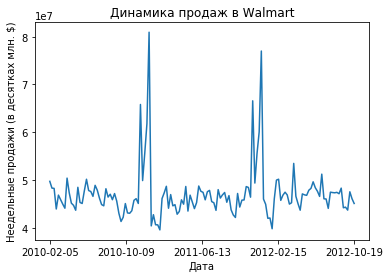

In [39]:
fig = plt.plot(date_sale_groupped)
plt.title('Динамика продаж в Walmart')
plt.xlabel('Дата')
plt.ylabel('Неедельные продажи (в десятках млн. $)')

locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(pd.date_range(min(date_sale['Date']), max(date_sale['Date']), periods=5))  # Set text labels and properties.

Скачки, вероятно, связаны с Рождеством(меньшая вершина) и Новым Годом(большая вершина).

__5__

In [40]:
numerical = df.drop(['Date', 'Type', 'IsHoliday'], axis=1)

In [41]:
corr = numerical.corr()
corr

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,0.024170,-0.085175,-0.182654,-0.049933,0.064666,-0.211129,0.208524
Dept,0.024170,1.000000,0.148345,-0.003026,0.004509,0.003417,-0.007544,0.007992
Weekly_Sales,-0.085175,0.148345,1.000000,0.243733,-0.002197,0.000385,-0.020791,-0.026114
Size,-0.182654,-0.003026,0.243733,1.000000,-0.057979,0.003803,-0.003249,-0.068803
Temperature,-0.049933,0.004509,-0.002197,-0.057979,1.000000,0.144837,0.181292,0.097301
Fuel_Price,0.064666,0.003417,0.000385,0.003803,0.144837,1.000000,-0.163226,-0.032461
CPI,-0.211129,-0.007544,-0.020791,-0.003249,0.181292,-0.163226,1.000000,-0.299723
Unemployment,0.208524,0.007992,-0.026114,-0.068803,0.097301,-0.032461,-0.299723,1.000000


(8.5, -0.5)

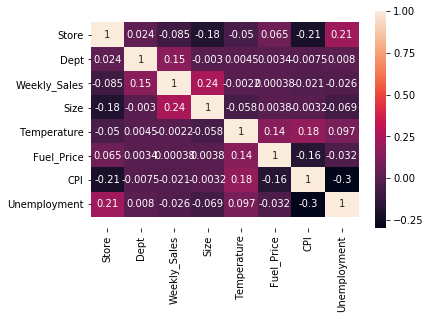

In [50]:
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1, top-1)

(8.5, -0.5)

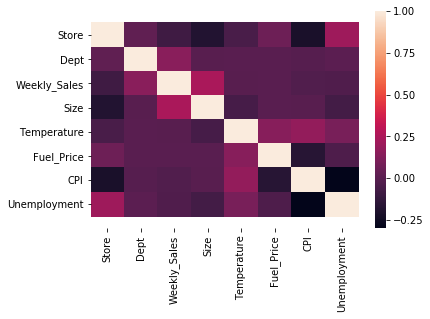

In [65]:
# Визуализирую матрицу корреляции
fig = sns.heatmap(corr)
fig.set_ylim(fig.get_ylim()[0]+1, fig.get_ylim()[1]-1)

__6__

In [42]:
stores = df['Store'] + df['Weekly_Sales']
stores
df.take([0, 1, 3], axis=1)

,Store,Date,Weekly_Sales
0,1,2010-02-05,24924.50
1,1,2010-02-12,46039.49
2,1,2010-02-19,41595.55
3,1,2010-02-26,19403.54
4,1,2010-03-05,21827.90
...,...,...,...
418234,45,2012-09-21,467.30
418235,45,2012-09-28,508.37
418236,45,2012-10-05,628.10
418237,45,2012-10-12,1061.02


In [43]:
s = dict()
for x in range(len(df['Store'])):
    if df['Store'][x] in s:
        s[df['Store'][x]] += df['Weekly_Sales'][x]
    else:
        s[df['Store'][x]] = df['Weekly_Sales'][x]

In [44]:
s_sorted = {k: v for k, v in sorted(s.items(), key=lambda item: item[1], reverse=True)[:5]}
print('топ-5 самых больших магазинов по суммарным продажам за все время (и их продажи) ' + str(s_sorted))

топ-5 самых больших магазинов по суммарным продажам за все время (и их продажи) {20: 299366021.99999964, 4: 297394029.39999986, 14: 287295221.749999, 13: 284481088.03999877, 2: 273547552.6200003}


In [45]:
top_sales = df.take([0, 1, 3], axis=1)
top_sales_groupped = sorted(top_sales.groupby(['Store']).sum().items())

In [46]:
sss = df.take([0, 1, 3], axis=1)
test = sss.loc[sss['Store'] == 20]
test1 = sss.loc[sss['Store'] == 4]
test2 = sss.loc[sss['Store'] == 14]
test3 = sss.loc[sss['Store'] == 13]
test4 = sss.loc[sss['Store'] == 2]

In [47]:
# start = pd.Timestamp(min(test['Date']))
# end = pd.Timestamp(max(test['Date']))
# t = np.linspace(start.value, end.value, 10167)

In [48]:
# отсортируем данные по дате
test_sorted = test.sort_values(by=['Date'])
test1_sorted = test1.sort_values(by=['Date'])
test2_sorted = test2.sort_values(by=['Date'])
test3_sorted = test3.sort_values(by=['Date'])
test4_sorted = test4.sort_values(by=['Date'])

In [49]:
# просуммируем данные внутри каждого дня, чтобы избежать вертикальных прямых из-за нескольких точек в один день
test_sorted = test_sorted.groupby(by=test_sorted['Date']).sum().reset_index()
test1_sorted = test1_sorted.groupby(by=test1_sorted['Date']).sum().reset_index()
test2_sorted = test2_sorted.groupby(by=test2_sorted['Date']).sum().reset_index()
test3_sorted = test3_sorted.groupby(by=test3_sorted['Date']).sum().reset_index()
test4_sorted = test4_sorted.groupby(by=test4_sorted['Date']).sum().reset_index()

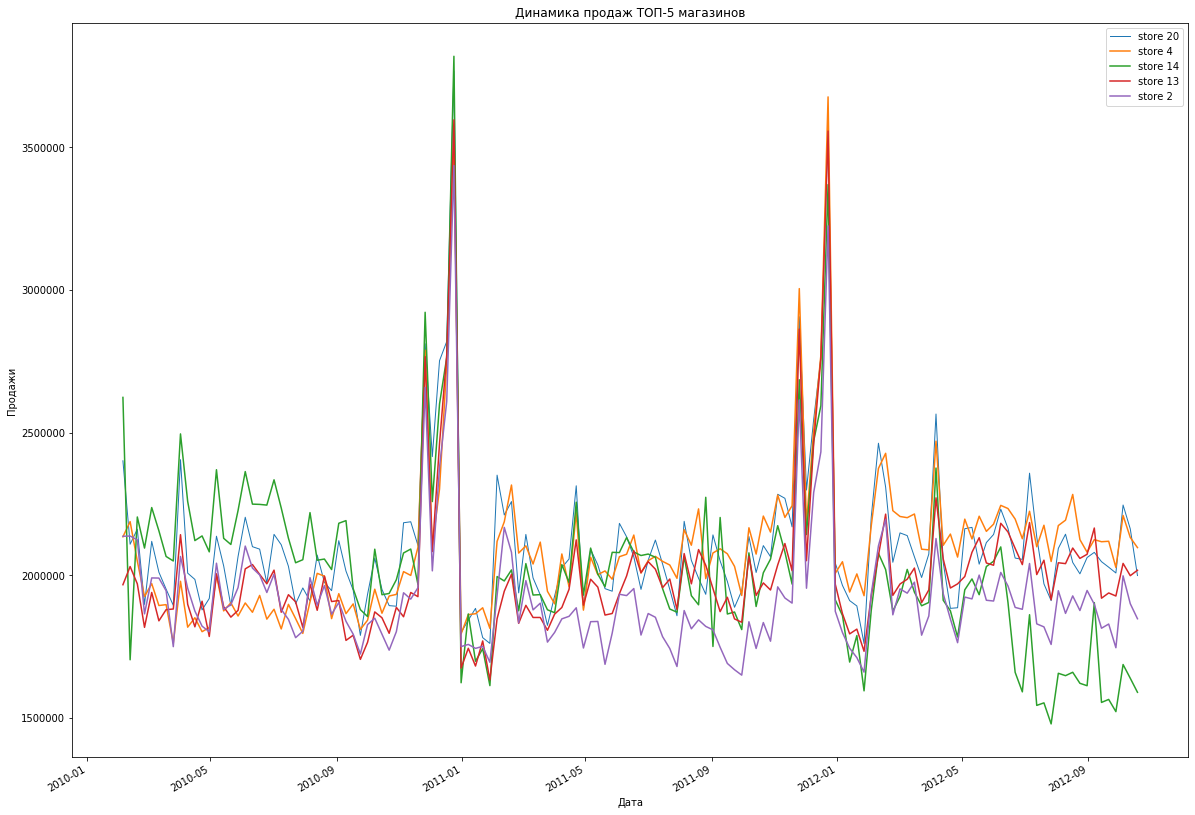

In [50]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(20)
ax.plot_date(test_sorted['Date'], test_sorted['Weekly_Sales'], '-', lw=1)
ax.plot_date(test1_sorted['Date'], test1_sorted['Weekly_Sales'], '-')
ax.plot_date(test2_sorted['Date'], test2_sorted['Weekly_Sales'], '-')
ax.plot_date(test3_sorted['Date'], test3_sorted['Weekly_Sales'], '-')
ax.plot_date(test4_sorted['Date'], test4_sorted['Weekly_Sales'], '-')
ax.set(title='Динамика продаж ТОП-5 магазинов', xlabel='Дата', ylabel='Продажи')
fig.autofmt_xdate()
plt.legend(['store 20', 'store 4', 'store 14', 'store 13', 'store 2'])
#ax.set_xlim([datetime.date('2010-02-05'), datetime.date('2012-10-19')])

__7__

In [51]:
top_dept = df.take([0, 1, 2, 3, 5], axis=1)

In [52]:
# выберем департаменты типа А в 2011
top_dept = top_dept.loc[top_dept['Type']=='A'] 
top_dept = top_dept.loc[(top_dept['Date']<=pd.to_datetime('2011-12-31')) & (top_dept['Date']>=pd.to_datetime('2011-01-01'))]

In [53]:
top_dept_sum = top_dept.groupby(['Store', 'Dept']).sum().reset_index()

In [54]:
top_dept_sum

,Store,Dept,Weekly_Sales
0,1,1,1171550.80
1,1,2,2389421.29
2,1,3,666007.83
3,1,4,1896108.60
4,1,5,1305833.52
...,...,...,...
1622,41,95,4608257.24
1623,41,96,141946.25
1624,41,97,1048014.90
1625,41,98,495454.69


In [55]:
top_ten_dept = top_dept_sum.sort_values(by=['Weekly_Sales'])[len(top_dept_sum)-10:len(top_dept_sum)]

In [56]:
top_ten_dept

,Store,Dept,Weekly_Sales
146,2,95,7252149.29
598,14,95,7564999.25
977,27,92,7619980.54
753,20,95,7629207.10
221,4,95,7721576.51
218,4,92,8405121.25
520,13,92,8487028.35
143,2,92,8527670.75
750,20,92,8595537.34
595,14,92,9629568.58


In [57]:
asd = {'Store': list(top_ten_dept['Store']), 'Dept': list(top_ten_dept['Dept'])}
asd

{'Store': [2, 14, 27, 20, 4, 4, 13, 2, 20, 14],
 'Dept': [95, 95, 92, 95, 95, 92, 92, 92, 92, 92]}

In [58]:
top_ten_dept['Weekly_Sales']

146    7252149.29
598    7564999.25
977    7619980.54
753    7629207.10
221    7721576.51
218    8405121.25
520    8487028.35
143    8527670.75
750    8595537.34
595    9629568.58
Name: Weekly_Sales, dtype: float64

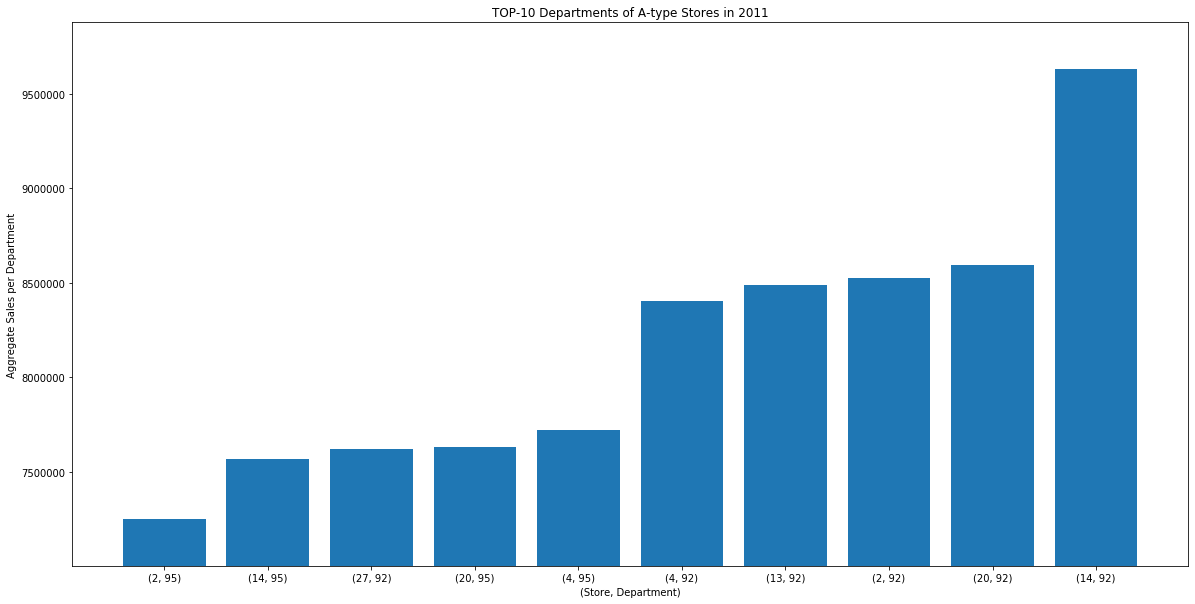

In [59]:
x = list(map(str, [(2, 95), (14, 95), (27, 92), (20, 95), (4, 95), (4, 92), (13, 92), (2, 92), (20, 92), (14, 92)]))
y = top_ten_dept['Weekly_Sales']

fig, ax = plt.subplots()

ax.bar(x, y)

fig.set_figwidth(20)
fig.set_figheight(10)
ax.set(ylim=(min(top_ten_dept['Weekly_Sales'])-250000, max(top_ten_dept['Weekly_Sales'])+250000))
ax.set_xlabel('(Store, Department)')
ax.set_ylabel('Aggregate Sales per Department')
ax.set_title('TOP-10 Departments of A-type Stores in 2011')

plt.show()

## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

In [60]:
# Получим токен по ссылке
# https://oauth.vk.com/authorize?client_id=**********&scope=8198&redirect_uri=https://oauth.vk.com/blank.html&display=page&v=5.16&response_type=token

# версия используемого API
version = '5.103' 

# подгружаем токен из файлика на компьютере
with open('secret_token.txt') as f:
    token = f.read()

In [61]:
method = 'users.get'
parameters = 'user_ids=1'

url = 'https://api.vk.com/method/' + method + '?' + parameters + '&v=' + version + '&access_token=' + token

response = requests.get(url) 
response.json()

{'response': [{'id': 1,
   'first_name': 'Павел',
   'last_name': 'Дуров',
   'is_closed': False,
   'can_access_closed': True}]}

In [62]:
def vk_download(method, parameters):
    url = 'https://api.vk.com/method/' + method + '?' + parameters + '&access_token=' + token + '&v=' + version
    response = requests.get(url).json()
    return response

In [63]:
group_id = '23482909'
fllws = []
for x in tqdm(range(1000)):
    fllw = vk_download('groups.getMembers', 'group_id={}&count=100&offset={}'.format(group_id, str(100*x)))
    followers = fllw['response']['items']
    fllws += followers
    time.sleep(0.4)

100%|██████████| 1000/1000 [08:20<00:00,  2.00it/s]


In [64]:
fllws_bdays = []
for y in tqdm(range(1000)):
    fllws1 = vk_download('users.get','user_ids={}&fields=bdate'.format(','.join(list(map(str, fllws[100*y:100*y+100])))))
    fllws_bdays += fllws1['response']
    time.sleep(0.4)

100%|██████████| 1000/1000 [08:56<00:00,  1.86it/s]


In [65]:
len(fllws_bdays)

100000

In [66]:
df_bd = pd.DataFrame(fllws_bdays) # датафрейм для 100 000 подписчиков (с их датами рождения)

In [67]:
df_bd.iloc()[49372:49372+7]

,id,first_name,last_name,is_closed,can_access_closed,bdate,deactivated
49372,31448795,Вячеслав,Крюков,False,True,NaN,NaN
49373,31452987,Александр,Проклов,True,False,NaN,NaN
49374,31455676,Юлия,Соколова,False,True,28.2.1995,NaN
49375,31461733,Эдуард,Κрюков,NaN,NaN,NaN,banned
49376,31461749,София,Соснина,False,True,16.4,NaN
49377,31464071,Серёжа,Мещеряков,False,True,1.5,NaN
49378,31465511,DELETED,,NaN,NaN,NaN,deleted


In [68]:
df_bd = df_bd.dropna(subset=['bdate'])

In [69]:
dff = df_bd.copy()

In [70]:
def text_parser(text):
    text1 = text.split('.')
    dttm = pd.to_datetime('-'.join(text1[0:2]), format='%d-%m', errors='coerce')
    return dttm

# при таком парсинге, датам будет присвоен дефолтный 1900 год, однако нас это не интересует, 
# поскольку важен день и месяц рождения

In [71]:
# cal = {'1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr', '5': 'May', '6': 'Jun', '7': 'Jul', '8': 'Aug', '9': 'Sep', 
# '10': 'Oct', '11': 'Nov', '12': 'Dec',}

# def month_parser0(text):
#     text1 = text.split('.')
#     dttm = cal[str(int(text1[1]))]
#     return dttm

In [72]:
def month_parser(text):
    text1 = text.split('.')
    dttm = pd.to_datetime(str(text1[1]), format='%m')
    return dttm

In [73]:
df_bd['bdate'] = dff['bdate'].apply(text_parser)

In [74]:
df_bd = df_bd.dropna(subset=['bdate'])

In [75]:
df_bd['month'] = dff['bdate'].apply(month_parser)

In [76]:
df_bd

,id,first_name,last_name,is_closed,can_access_closed,bdate,deactivated,month
1,19,Светочек,Аленький,False,True,1900-12-12,NaN,1900-12-01
2,34,Татьяна,Плуталова,False,True,1900-06-02,NaN,1900-06-01
3,309,Ilya,Krivonogov,True,False,1900-10-18,NaN,1900-10-01
6,1011,Максим,Петренчук,True,False,1900-10-01,NaN,1900-10-01
7,1092,Roman,Kurilov,False,True,1900-11-08,NaN,1900-11-01
...,...,...,...,...,...,...,...,...
99988,146588322,Алеся,Дедяева,False,True,1900-06-11,NaN,1900-06-01
99989,146589417,Вероника,Попова,False,True,1900-02-19,NaN,1900-02-01
99990,146589819,Светлана,Губарева-Жидкова,False,True,1900-01-07,NaN,1900-01-01
99993,146602470,Ксения,Миронова,False,True,1900-05-18,NaN,1900-05-01


Text(0, 0.5, 'кол-во человек')

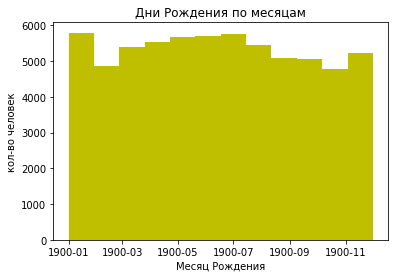

In [77]:
#aaa = df_bd['id'][20:50] + df_bd['month'][20:50]
aaa = df_bd['month']
#aaa = pd.concat([df_bd['month'], df_bd['id']], axis=1)
#aaa = df_bd.take([0, len(df_bd.columns)-1], axis=1)
plt.hist(aaa, bins=12, color='y')
plt.title('Дни Рождения по месяцам')
plt.xlabel('Месяц Рождения')
plt.ylabel('кол-во человек')

Распределение Дней Рождения по месяцам близко к равномерному. Небольшой провал в Феврале можно объяснить меньшм количеством дней в месяце(28 или 29 против 30 или 31).

In [78]:
type(df_bd['bdate'])

pandas.core.series.Series

In [79]:
def same_bday(arr):
    l = list(arr)
    if len(l) == len(list(set(l))): # Нет общих Дней Рождения
        return 0 
    else:                           # Есть общие Дни Рождения
        return 1

In [80]:
def intersection_p(date_data, day_window: int):
    inters = 0
    size = 10000
    for x in range(size):
        a = np.random.randint(0, len(date_data)-day_window)
        sample = np.array(date_data)[a:a+day_window]
        inters += same_bday(sample)
    return inters / size

In [81]:
print('Вероятность того, что в случайной выборке из 50 человек хотя бы у двоих совпадет День Рождения эмпирически равна: ' + '\n' + str(intersection_p(df_bd['bdate'], 50)))

Вероятность того, что в случайной выборке из 50 человек хотя бы у двоих совпадет День Рождения эмпирически равна: 
0.9741


Сделав несколько симуляций, получаем, что в среднем, выборочная вероятность близка к теоретической. В большинстве симуляций, она немного превосходила ее(на 0.005, в среднем). Причиной, вероятно, является особенность выборки(большое количество людей с пересекающимеся Днями Рождениями в выборке).